<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-4" data-toc-modified-id="Chapter-4-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 4</a></span></li></ul></div>

## Chapter 4

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_gpickle('github_users.p')
sub_nodes = ['u41', 'u69', 'u96', 'u156', 'u297', 'u298', 'u315', 'u322', 'u435', 'u440', 'u640', 'u655', 'u698', 'u821', 'u863', 'u901', 'u914', 'u1254', 'u1407', 'u1468', 'u1908', 'u2022', 'u2066', 'u2137', 'u2289', 'u2482', 'u2552', 'u2643', 'u2737', 'u2906', 'u3083', 'u3174', 'u3231', 'u3243', 'u3271', 'u3658', 'u3974', 'u3979', 'u4159', 'u4199', 'u4329', 'u4412', 'u4513', 'u4710', 'u4761', 'u4953', 'u5082', 'u5337', 'u5693', 'u5993', 'u6081', 'u7418', 'u7623', 'u7963', 'u8135', 'u9866', 'u9869', 'u9997', 'u10090', 'u10340', 'u10500', 'u10603', 'u14964']
G_sub = G.subgraph(sub_nodes)

for n in G_sub.nodes():
    if n == 'u14964':
        G_sub.node[n]['grouping'] = 1
    else:
        G_sub.node[n]['grouping'] = 0

In [47]:
len(G.nodes())

56519

In [16]:
len(G.edges())

72900

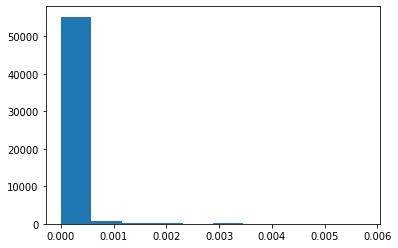

In [48]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()


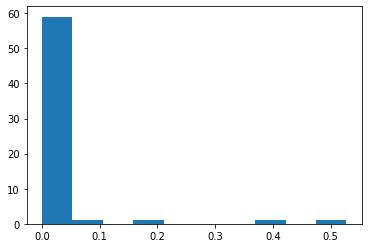

In [49]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G_sub).values()))
plt.show()


In [50]:
G_sub.nodes().values()

ValuesView(NodeView(('u5993', 'u2289', 'u1407', 'u4159', 'u8135', 'u96', 'u1254', 'u6081', 'u3231', 'u863', 'u440', 'u3658', 'u41', 'u2022', 'u435', 'u10500', 'u914', 'u3083', 'u821', 'u5082', 'u3974', 'u7963', 'u14964', 'u698', 'u315', 'u9869', 'u4710', 'u4412', 'u2737', 'u2482', 'u4199', 'u5337', 'u10603', 'u298', 'u297', 'u7623', 'u9866', 'u2137', 'u9997', 'u2066', 'u655', 'u10090', 'u69', 'u10340', 'u5693', 'u3243', 'u2643', 'u322', 'u4953', 'u640', 'u3174', 'u7418', 'u156', 'u3271', 'u4761', 'u4513', 'u1908', 'u2906', 'u1468', 'u901', 'u2552', 'u3979', 'u4329')))

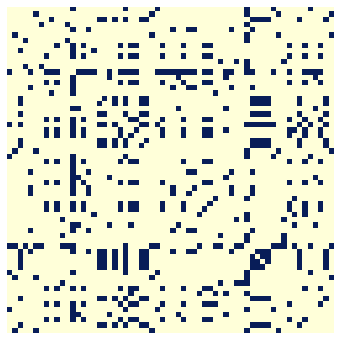

In [52]:
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G_sub), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

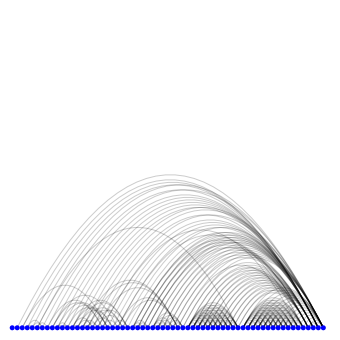

In [54]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G_sub.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G_sub.node[n]['degree'] = nx.degree(G_sub, n)

# Create the ArcPlot object: a
a = ArcPlot(G_sub, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

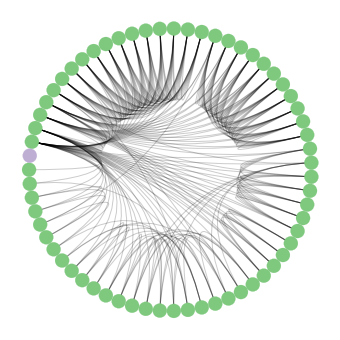

In [55]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes, including the metadata
for n, d in G_sub.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G_sub.node[n]['degree'] = nx.degree(G_sub, n)

# Create the CircosPlot object: c
c = CircosPlot(G_sub, node_order='degree', node_grouping='grouping', node_color='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

In [58]:
# Calculate the maximal cliques in G: cliques
cliques = 

# Count and print the number of maximal cliques in G
print(" ", len(list(cliques)))

  19


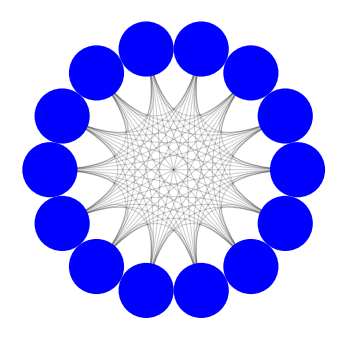

In [64]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G_sub), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G_sub.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()


In [74]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G_sub)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(" ", prolific_collaborators)

  ['u2022']


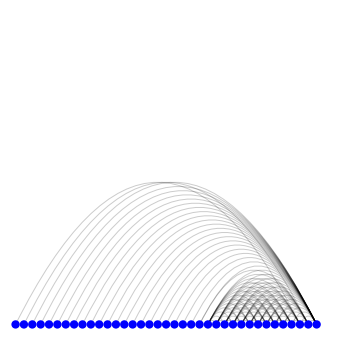

In [80]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G_sub), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G_sub.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G_sub.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G_sub.neighbors(node))), G_sub.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [95]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G_sub.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G_sub.neighbors(n), r=2):

        # Check whether n1 and n2 do not have an edge
        if not G_sub.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


  2
[('u2022', 'u4159'), ('u655', 'u2022')]
